In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


<h2> <b><span style="color:orange"> 1. Load Dataset Cat & Dog</span></b></h2>

In [56]:
# Import libraries
# from keras.layers import Input, Lambda, Dense, Flatten
# from keras.models import Model
# from keras.applications.InceptionResNetV2 import InceptionResNetV2
# from keras.applications.InceptionResNetV2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# import numpy as np
# from glob import glob
import matplotlib.pyplot as plt

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mat4py import loadmat

In [58]:
import cv2


In [59]:
# from mat4py import loadmat
data = loadmat('CatDog.mat')

In [60]:
# Extracting 'X', 'G', 'nx', and 'ny'
X = data['X']
Y = data['G']
nx = data['nx']
ny = data['ny']

In [61]:
# Convert lists X and Y to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# Check the shapes of the NumPy arrays
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (4096, 242)
Shape of Y: (242,)


In [62]:
data.keys()

dict_keys(['X', 'G', 'nx', 'ny'])

<h2> <b><span style="color:orange"> 2. Preprocess Data</span></b></h2>

## 2.1 Scale data

In [63]:
# 1. Transpose the feature matrix 'X'
X_transposed = np.transpose(X)

In [64]:
# 2. Normalizing 'X' to the range [0, 1]
X_normalized = (X_transposed - np.min(X_transposed)) / (np.max(X_transposed) - np.min(X_transposed))

In [65]:
# 3. Reshaping 'X' to (n, 64, 64, 1) (batch size; width in pixels; height in pixels; color 1 = gray, 3 = rbg)
X_reshaped = X_normalized.reshape(-1, nx, ny, 1)

In [66]:

# 4. Converting to RGB scale (replicating the single channel to three channels)
X_rgb = np.concatenate([X_reshaped] * 3, axis=-1)


In [67]:
# 5. Transpose images (swapping height and width dimensions to rotate images by 90 degrees clockwise)
X_rotated = np.transpose(X_rgb, (0, 2, 1, 3))[:, ::1, :, :]

In [68]:
print("Original shape:", X.shape)
print("Transposed shape:", X_transposed.shape)
print("Normalized shape:", X_normalized.shape)
print("Reshaped shape:", X_reshaped.shape)
print("RGB shape:", X_rgb.shape)
print("Rotated shape:", X_rotated.shape)

Original shape: (4096, 242)
Transposed shape: (242, 4096)
Normalized shape: (242, 4096)
Reshaped shape: (242, 64, 64, 1)
RGB shape: (242, 64, 64, 3)
Rotated shape: (242, 64, 64, 3)


In [88]:
# Redize X_rotated that are 64x64x3 images to 75x75x3 images
resized_images = []

for img in X_rotated:
    # Convert the image to uint8 format
    img_uint8 = np.uint8(img * 255)
    
    # Resize the image to 75x75 using OpenCV
    resized_img = cv2.resize(img_uint8, (75, 75), interpolation=cv2.INTER_AREA)
    
    # Normalize the resized image back to range [0, 1]
    resized_img = resized_img / 255.0
    
    # Append the resized image to the list
    resized_images.append(resized_img)

# Convert the list of resized images to a NumPy array
X_resized = np.array(resized_images)

In [89]:
print(X_resized.shape)

(242, 75, 75, 3)


<h2> <b><span style="color:orange"> 3. Discover and Visualize the Data to Gain Insights</span></b></h2>

In [91]:
# Reshape 'X_rotated' to have dimensions (64, 64, 3) and represents color images (RGB)
images = np.array(X_rotated).reshape(-1, nx, ny, 3)

<Axes: >

Text(0.5, 1.0, 'Cat')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog')

(-0.5, 63.5, 63.5, -0.5)

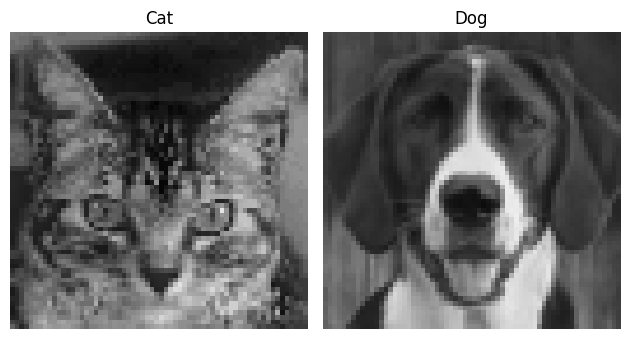

In [92]:
# Find indices for cat and dog image
cat_index = np.where(Y == 0)[0][0]  # 0 == a cat label
dog_index = np.where(Y== 1)[0][0]  # 1 == a dog label 

# Display cat and dog images
plt.subplot(1, 2, 1)
plt.imshow(images[cat_index]) 
# plt.imshow(images[cat_index], cmap='gray') 
plt.title("Cat")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(images[dog_index])
# plt.imshow(images[dog_index], cmap='gray')
plt.title("Dog")
plt.axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<Figure size 1000x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Cat 1')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 2')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 3')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 4')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Cat 5')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 1')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 2')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 3')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 4')

(-0.5, 63.5, 63.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Dog 5')

(-0.5, 63.5, 63.5, -0.5)

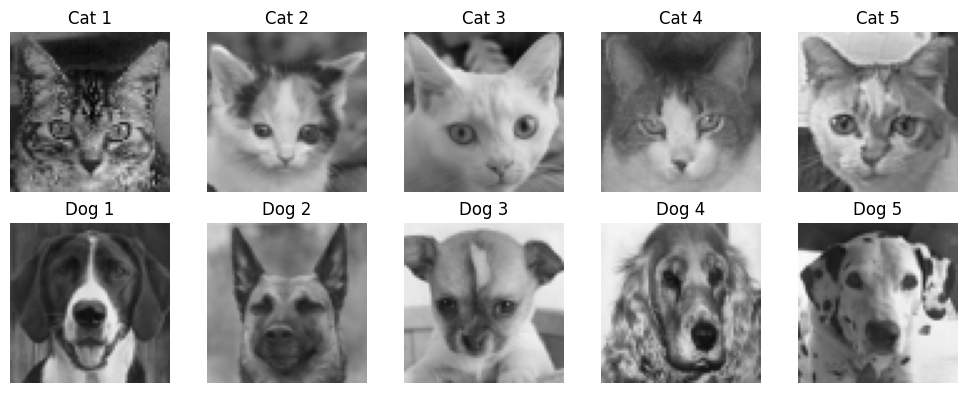

In [71]:
# Display the first 5 images of cats and dogs

# Find indices for cat and dog images
cat_indices = np.where(Y == 0)[0]  # 0 == a cat label
dog_indices = np.where(Y == 1)[0]  # 1 == a dog label

plt.figure(figsize=(10, 4))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[cat_indices[i]], cmap='gray') 
    plt.title(f"Cat {i + 1}")
    plt.axis('off')

for i in range(5):
    plt.subplot(2, 5, 5 + i + 1)
    plt.imshow(images[dog_indices[i]], cmap='gray')
    plt.title(f"Dog {i + 1}")
    plt.axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<h2> <b><span style="color:orange"> 4. Train Test Split </span></b></h2>

In [93]:
print("Shape of X:", X_resized.shape)
print("Shape of Y:", Y.shape)

Shape of X: (242, 75, 75, 3)
Shape of Y: (242,)


In [96]:
# Reshape Y to match the number of samples in X
# Y = np.expand_dims(Y, axis=1)  # Adds a new axis to Y to match the number of samples in X

from sklearn.model_selection import train_test_split
# Perform the train-test split with updated Y
X_train, X_test, Y_train, Y_test = train_test_split(X_resized, Y, test_size=0.2, random_state=2)


In [97]:
print("Shape of X:", X_test.shape)
print("Shape of Y:", Y_test.shape)

Shape of X: (49, 75, 75, 3)
Shape of Y: (49,)


<h2> <b><span style="color:orange"> 5. Build model for prediction </span></b></h2>

In [120]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Activation
from keras.models import Model
from keras.layers import Input, BatchNormalization, Conv2D, Flatten, Dense, Dropout, Lambda
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications import InceptionResNetV2
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras.callbacks import Callback
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
import tensorflow as tf

from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.inception_resnet_v2 import preprocess_input

### Try: layer.trainable = False

In [353]:
def create_inceptionresnetv2_model(input_shape, n_out):
    base_model = InceptionResNetV2(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape)  # Set input shape to 75x75x3
    
    # Freeze layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    input_tensor = Input(shape=input_shape)
    bn = BatchNormalization()(input_tensor)
    x = preprocess_input(bn)  # Preprocess the input data
    x = base_model(x)
   
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(n_out, activation='sigmoid')(x)
    
    model = Model(input_tensor, output)
        
    return model

In [354]:
input_shape = (75, 75, 3)
output_class = 1

# Create the InceptionResNetV2-based model
inceptionresnetv2_model = create_inceptionresnetv2_model(input_shape=input_shape, n_out=output_class)

In [326]:
inceptionresnetv2_model.summary()

Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_84 (InputLayer)       [(None, 75, 75, 3)]       0         
                                                                 
 batch_normalization_8366 (  (None, 75, 75, 3)         12        
 BatchNormalization)                                             
                                                                 
 tf.math.truediv_38 (TFOpLa  (None, 75, 75, 3)         0         
 mbda)                                                           
                                                                 
 tf.math.subtract_38 (TFOpL  (None, 75, 75, 3)         0         
 ambda)                                                          
                                                                 
 inception_resnet_v2 (Funct  (None, 1, 1, 1536)        54336736  
 ional)                                                   

In [376]:
inceptionresnetv2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [377]:
Y_train = Y_train.squeeze()  # Ensure the labels are 1D
# Train the model
hist = inceptionresnetv2_model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
7/7 [==============================] - 13s 764ms/step - loss: 0.6867 - accuracy: 0.5078 - val_loss: 0.6901 - val_accuracy: 0.5102
Epoch 2/10
7/7 [==============================] - 2s 353ms/step - loss: 0.6912 - accuracy: 0.5026 - val_loss: 0.6860 - val_accuracy: 0.5306
Epoch 3/10
7/7 [==============================] - 3s 375ms/step - loss: 0.6866 - accuracy: 0.5337 - val_loss: 0.6841 - val_accuracy: 0.5102
Epoch 4/10
7/7 [==============================] - 3s 387ms/step - loss: 0.6745 - accuracy: 0.5544 - val_loss: 0.6856 - val_accuracy: 0.5918
Epoch 5/10
7/7 [==============================] - 3s 358ms/step - loss: 0.6784 - accuracy: 0.5699 - val_loss: 0.6923 - val_accuracy: 0.4898
Epoch 6/10
7/7 [==============================] - 2s 355ms/step - loss: 0.6763 - accuracy: 0.5751 - val_loss: 0.6839 - val_accuracy: 0.5918
Epoch 7/10
7/7 [==============================] - 2s 350ms/step - loss: 0.6691 - accuracy: 0.5648 - val_loss: 0.6873 - val_accuracy: 0.5306
Epoch 8/10
7/7 [===

In [368]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_custom_model(input_shape, n_out):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_out, activation='sigmoid'))  # Sigmoid for binary classification

    return model



In [403]:
input_shape = (75, 75, 3)
output_class = 1

custom_model = create_custom_model(input_shape=input_shape, n_out=output_class)
custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [428]:
custom_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9758 (Conv2D)        (None, 73, 73, 32)        896       
                                                                 
 max_pooling2d_195 (MaxPool  (None, 36, 36, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_9759 (Conv2D)        (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_196 (MaxPool  (None, 17, 17, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_9760 (Conv2D)        (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_197 (MaxPool  (None, 7, 7, 128)        

In [404]:
Y_train = Y_train.squeeze()  # Ensure the labels are 1D
# Train the model
hist3 = custom_model.fit(X_train, Y_train, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8
7/7 [==============================] - 1s 89ms/step - loss: 0.7142 - accuracy: 0.5285 - val_loss: 0.6804 - val_accuracy: 0.5306
Epoch 2/8
7/7 [==============================] - 0s 62ms/step - loss: 0.6595 - accuracy: 0.6269 - val_loss: 0.6288 - val_accuracy: 0.7347
Epoch 3/8
7/7 [==============================] - 0s 63ms/step - loss: 0.6026 - accuracy: 0.7098 - val_loss: 0.5660 - val_accuracy: 0.6531
Epoch 4/8
7/7 [==============================] - 0s 61ms/step - loss: 0.4950 - accuracy: 0.7202 - val_loss: 0.4765 - val_accuracy: 0.8163
Epoch 5/8
7/7 [==============================] - 0s 62ms/step - loss: 0.3224 - accuracy: 0.8446 - val_loss: 0.3695 - val_accuracy: 0.8163
Epoch 6/8
7/7 [==============================] - 0s 61ms/step - loss: 0.2446 - accuracy: 0.8964 - val_loss: 0.3560 - val_accuracy: 0.8163
Epoch 7/8
7/7 [==============================] - 0s 62ms/step - loss: 0.1758 - accuracy: 0.9171 - val_loss: 0.2755 - val_accuracy: 0.8776
Epoch 8/8
7/7 [===================

<h3> <b><span style="color:orange"> 6)	Evaluate model </span></b></h3>

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

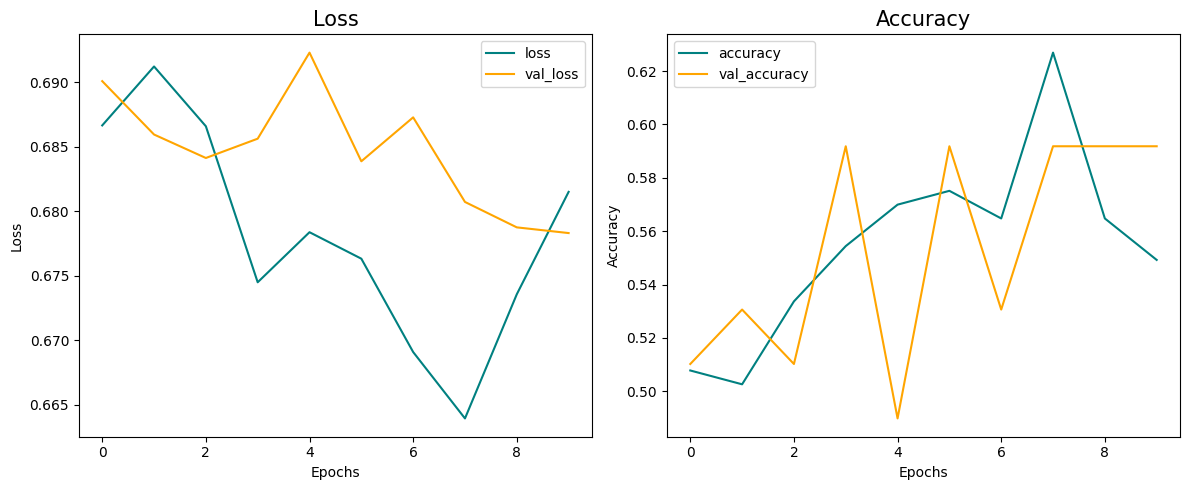

In [381]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axs[0].plot(hist.history['loss'], color='teal', label='loss')
axs[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
axs[0].set_title('Loss', fontsize=15)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Accuracy plot
axs[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
axs[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
axs[1].set_title('Accuracy', fontsize=15)
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

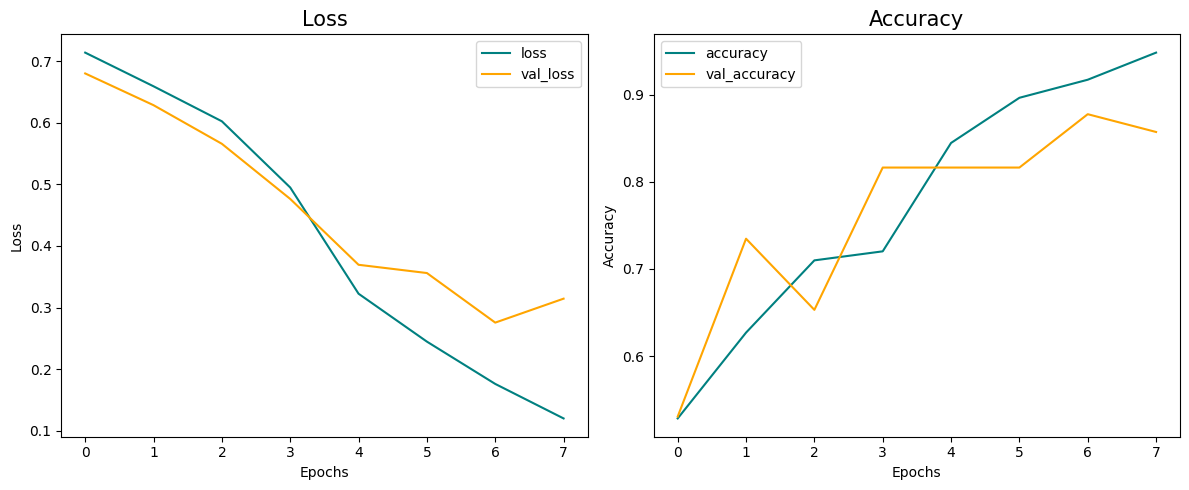

In [405]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axs[0].plot(hist3.history['loss'], color='teal', label='loss')
axs[0].plot(hist3.history['val_loss'], color='orange', label='val_loss')
axs[0].set_title('Loss', fontsize=15)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Accuracy plot
axs[1].plot(hist3.history['accuracy'], color='teal', label='accuracy')
axs[1].plot(hist3.history['val_accuracy'], color='orange', label='val_accuracy')
axs[1].set_title('Accuracy', fontsize=15)
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()

<h3> <b><span style="color:orange"> 7)	Use trained model to predict </span></b></h3>

1/1 [==============================] - 0s 29ms/step
Cat


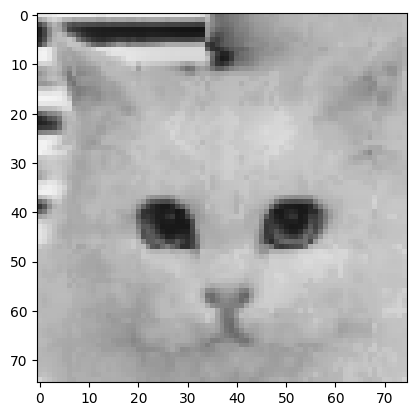

In [435]:
image_index = 44
plt.imshow(X_test[image_index].reshape(75, 75, 3))  # Display the image
pred = custom_model.predict(X_test[image_index].reshape(1, 75, 75, 3))  # Reshape to match input shape
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)

1/1 [==============================] - 0s 86ms/step
Cat


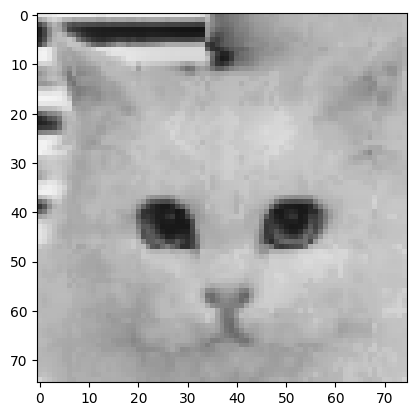

In [444]:
image_index = 44
plt.imshow(X_test[image_index].reshape(75, 75, 3))  # Display the image
pred2 = inceptionresnetv2_model.predict(X_test[image_index].reshape(1, 75, 75, 3))  # Reshape to match input shape
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)